# Modified equation to to keep real tax rates 

This is a copy which reads an old version of the pak model to compare the results 

## Import the model class
This class incorporates most of the methods used to manage a model. 

In [21]:
%matplotlib inline

In [2]:
 %load_ext autoreload
 %autoreload 2

In [3]:
from modelclass import model 
model.widescreen()
model.scroll_off()

## Load a pre-existing model, data and descriptions 
The file `pak.pcim` contains a dump of model equations, dataframe, simulation options and variable descriptions. 

In [24]:
mpak,baseline = model.modelload('../../models/pak_exogenized.pcim',run=1,silent=1,keep='No tax change')
mpakdisplay,_ = model.modelload('../../models/pak_exogenized.pcim',run=1,silent=1,keep='No tax change')

In [4]:
mpak,baseline = model.modelload(r"C:\wb new\Modelflow\ib\HowTo\pak_exogenized.pcim",run=1,silent=1,keep='No tax change')
mpakdisplay,_ = model.modelload(r"C:\wb new\Modelflow\ib\HowTo\pak_exogenized.pcim",run=1,silent=1,keep='No tax change')

## Define a list of CO2 emission tax rates
There is different taxrates for emission from oil, gas and coal 

In [5]:
taxvar  = mpak.vlist('PAKGGREVCO2???')

In [6]:
[[t,mpak.var_description[t]] for t in taxvar]

[['PAKGGREVCO2CER', 'PAKGGREVCO2CER'],
 ['PAKGGREVCO2GER', 'PAKGGREVCO2GER'],
 ['PAKGGREVCO2OER', 'PAKGGREVCO2OER']]

## Create a experiment  where nominal tax is set to 29

In [7]:
alternative_nominal = baseline.upd('<2020 2100> PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER = 29')
_ = mpak(alternative_nominal,2020,2100,keep=f'Coal, Oil and Gastax : 29 nominal')

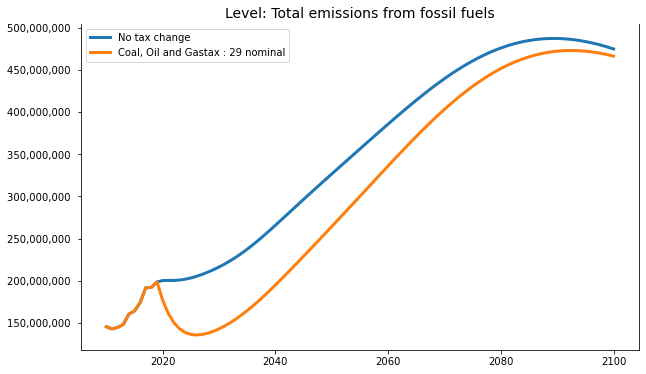

In [8]:
mpak.keep_plot('PAKCCEMISCO2TKN',2010,2100,legend=1);

## Now modify  the mpak model so the carbon tax can be kept constant in real terms

In the mpak model the carbon tax variables ```PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER``` where exogenous variables. Now equations for these variables are introduced to and a new modified model is created. 

Each tax variable are now determined by an equation which makes its growth rate follow the growth rate of GDF ```PAKNECONPRVTXN```. 

The new equations are made fixable, so the previous behavior can be preserved. The behavior in each year is determined by the ```<name>_D``` variable. If it is 1 the variable will take the value ```<name>_X``` if the value is 0 the expression will 
determine the value

In [9]:
mpakreal,baseline_real = mpak.equpdate('''\
<fixable> PAKGGREVCO2CER = PAKGGREVCO2CER(-1) * PAKNECONPRVTXN(-1) / PAKNECONPRVTXN(-2)
<fixable> PAKGGREVCO2OER = PAKGGREVCO2OER(-1) * PAKNECONPRVTXN(-1) / PAKNECONPRVTXN(-2)
<fixable> PAKGGREVCO2GER = PAKGGREVCO2GER(-1) * PAKNECONPRVTXN(-1) / PAKNECONPRVTXN(-2)
''',add_add_factor=False, calc_add=False,newname='Pak model, real adjusted tax')


The model:"Pak model" got new equations, new model name is:"Pak model, real adjusted tax"
New equation for For PAKGGREVCO2CER
Old frml   :new endogeneous variable 
New frml   :FRML <fixable> PAKGGREVCO2CER = (PAKGGREVCO2CER(-1)*PAKNECONPRVTXN(-1)/PAKNECONPRVTXN(-2))* (1-PAKGGREVCO2CER_D)+ PAKGGREVCO2CER_X*PAKGGREVCO2CER_D$
Adjust calc:No frml for adjustment calc  

New equation for For PAKGGREVCO2OER
Old frml   :new endogeneous variable 
New frml   :FRML <fixable> PAKGGREVCO2OER = (PAKGGREVCO2OER(-1)*PAKNECONPRVTXN(-1)/PAKNECONPRVTXN(-2))* (1-PAKGGREVCO2OER_D)+ PAKGGREVCO2OER_X*PAKGGREVCO2OER_D$
Adjust calc:No frml for adjustment calc  

New equation for For PAKGGREVCO2GER
Old frml   :new endogeneous variable 
New frml   :FRML <fixable> PAKGGREVCO2GER = (PAKGGREVCO2GER(-1)*PAKNECONPRVTXN(-1)/PAKNECONPRVTXN(-2))* (1-PAKGGREVCO2GER_D)+ PAKGGREVCO2GER_X*PAKGGREVCO2GER_D$
Adjust calc:No frml for adjustment calc  



## Nominal tax of 29 in the real model. 

In [10]:
alternative_real_model_nominal_tax = baseline_real.upd('''
<2023 2100> 
PAKGGREVCO2CER_D PAKGGREVCO2GER_D PAKGGREVCO2OER_D = 1
PAKGGREVCO2CER_X PAKGGREVCO2GER_X PAKGGREVCO2OER_X = 29
''')
_ = mpakreal(alternative_real_model_nominal_tax,2021,2100,alfa=0.5,keep='Real model nominal tax = 29')

In [11]:
# mpakreal.fix_inf() # for chekking 

## Real tac in the real model 


In [12]:
alternative_real_model_real_tax = baseline_real.upd('''
<2023 2023> 
PAKGGREVCO2CER_D PAKGGREVCO2GER_D PAKGGREVCO2OER_D = 1
PAKGGREVCO2CER_X PAKGGREVCO2GER_X PAKGGREVCO2OER_X = 29
<2024 2100> 
PAKGGREVCO2CER_D PAKGGREVCO2GER_D PAKGGREVCO2OER_D = 0 

''')
res = mpakreal(alternative_real_model_real_tax,2021,2100,alfa=0.5,keep='Real model Real tax = 29',silent=1)

In [13]:
mpakreal.fix_inf()


PAKGGEXPCAPTCN

FRML <Z,EXO> PAKGGEXPCAPTCN =( -PAKGGEXPCAPTCN_A*PAKGGEXPINTPCN + PAKGGEXPCAPTCN_A*PAKGGREVTOTLCN - PAKGGEXPINTPCN* (0.429201830409)  + PAKGGREVTOTLCN* (0.429201830409)  )*(1-PAKGGEXPCAPTCN_D)+PAKGGEXPCAPTCN_X*PAKGGEXPCAPTCN_D$


,PAKGGEXPCAPTCN,PAKGGEXPCAPTCN_X,PAKGGEXPCAPTCN_D,PAKGGEXPCAPTCN_A
2021,893336.534898,893336.534898,1,0.004736
2022,824679.593054,824679.593054,1,0.004736
2023,812060.146964,812060.146964,1,0.004736
2024,843148.164402,843148.164402,1,0.004736
2025,913175.014747,913175.014747,1,0.004736
2026,1020398.420652,1020398.420652,1,0.004736
2027,1162411.234307,1162411.234307,1,0.004736
2028,1334843.396382,1334843.396382,1,0.004736
2029,1531956.174047,1531956.174047,1,0.004736
2030,1748153.621861,1748153.621861,1,0.004736


,PAKGGEXPGNFSCN,PAKGGEXPGNFSCN_X,PAKGGEXPGNFSCN_D,PAKGGEXPGNFSCN_A
2021,3385230.593678,3385230.593678,1,0.498848
2022,3125060.354051,3125060.354051,1,0.498848
2023,3077239.927212,3077239.927212,1,0.498848
2024,3195045.595273,3195045.595273,1,0.498848
2025,3460406.998054,3460406.998054,1,0.498848
2026,3866721.908688,3866721.908688,1,0.498848
2027,4404868.624042,4404868.624042,1,0.498848
2028,5058287.136445,5058287.136445,1,0.498848
2029,5805230.957944,5805230.957944,1,0.498848
2030,6624494.681057,6624494.681057,1,0.498848


,PAKGGEXPOTHRCN,PAKGGEXPOTHRCN_X,PAKGGEXPOTHRCN_D,PAKGGEXPOTHRCN_A
2021,26384.838484,26384.838484,1,18929.523540
2022,24305.474919,24305.474919,1,16090.095009
2023,20761.383102,20761.383102,1,13676.580758
2024,16297.728027,16297.728027,1,11625.093644
2025,11231.129735,11231.129735,1,9881.329597
2026,5721.379439,5721.379439,1,8399.130158
2027,-152.724497,-152.724497,1,7139.260634
2028,-6336.965894,-6336.965894,1,6068.371539
2029,-12774.237748,-12774.237748,1,5158.115808
2030,-19402.763134,-19402.763134,1,4384.398437


,PAKGGEXPTRNSCN,PAKGGEXPTRNSCN_X,PAKGGEXPTRNSCN_D,PAKGGEXPTRNSCN_A
2021,308039.846675,308039.846675,1,122180.535209
2022,271490.150285,271490.150285,1,103853.461830
2023,247051.880848,247051.880848,1,88275.437004
2024,233001.603198,233001.603198,1,75034.109528
2025,228030.893162,228030.893162,1,63778.970594
2026,231357.623247,231357.623247,1,54212.104180
2027,242262.376522,242262.376522,1,46080.283614
2028,259822.089216,259822.089216,1,39168.216085
2029,282928.589418,282928.589418,1,33292.959760
2030,310483.027128,310483.027128,1,28299.037801



PAKGGEXPGNFSCN

FRML <Z,EXO> PAKGGEXPGNFSCN =( -PAKGGEXPGNFSCN_A*PAKGGEXPINTPCN + PAKGGEXPGNFSCN_A*PAKGGREVTOTLCN - PAKGGEXPINTPCN* (1.14552721003)  + PAKGGREVTOTLCN* (1.14552721003)  )*(1-PAKGGEXPGNFSCN_D)+PAKGGEXPGNFSCN_X*PAKGGEXPGNFSCN_D$

PAKGGEXPOTHRCN

FRML <Z,EXO> PAKGGEXPOTHRCN =( 0.59969807638*PAKGGEXPOTHRCN(-1)+(1-0.59969807638)*(-0.01*(PAKGGREVTOTLCN-PAKGGEXPINTPCN(-0))) + PAKGGEXPOTHRCN_A )*(1-PAKGGEXPOTHRCN_D)+PAKGGEXPOTHRCN_X*PAKGGEXPOTHRCN_D$

PAKGGEXPTRNSCN

FRML <Z,EXO> PAKGGEXPTRNSCN =( 0.197732974531*PAKGGEXPTRNSCN(-1)+(1-0.197732974531)*(0.07*(PAKGGREVTOTLCN-PAKGGEXPINTPCN(-0))) + PAKGGEXPTRNSCN_A )*(1-PAKGGEXPTRNSCN_D)+PAKGGEXPTRNSCN_X*PAKGGEXPTRNSCN_D$


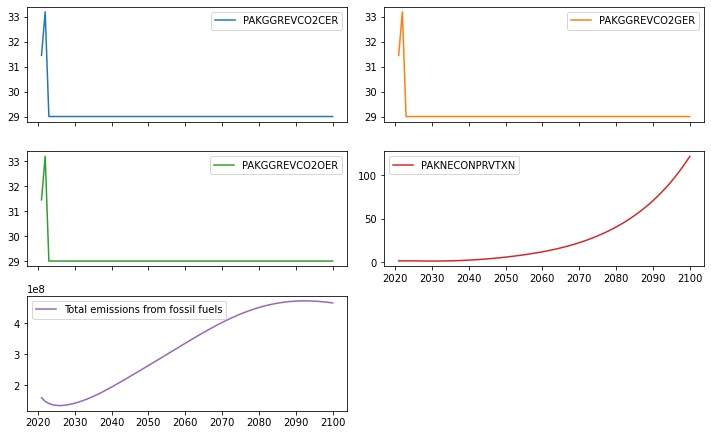

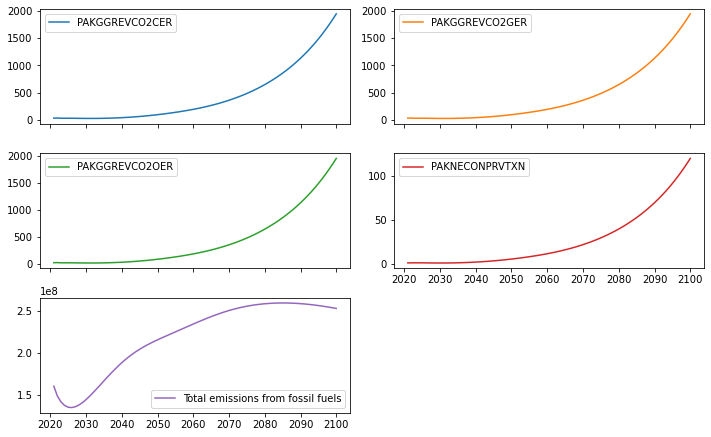

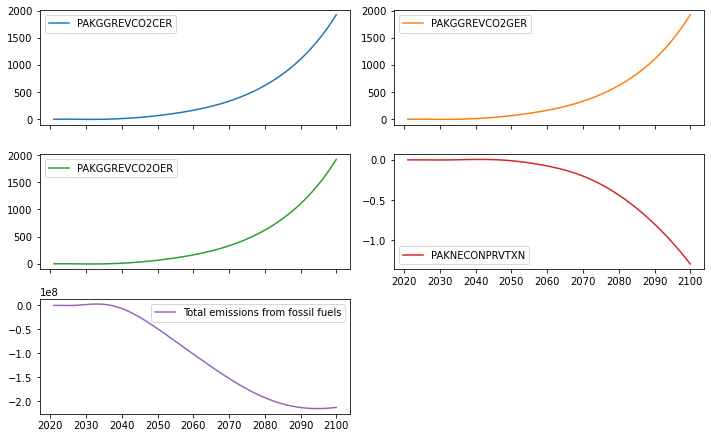

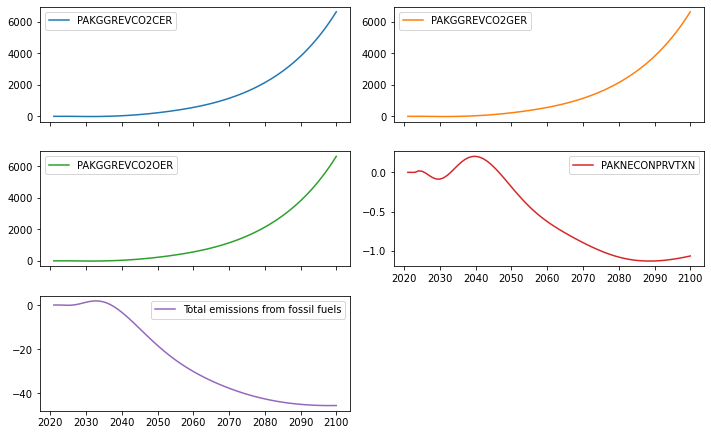

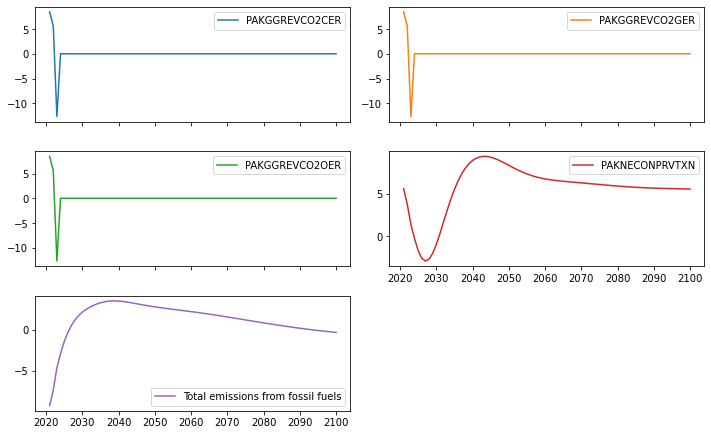

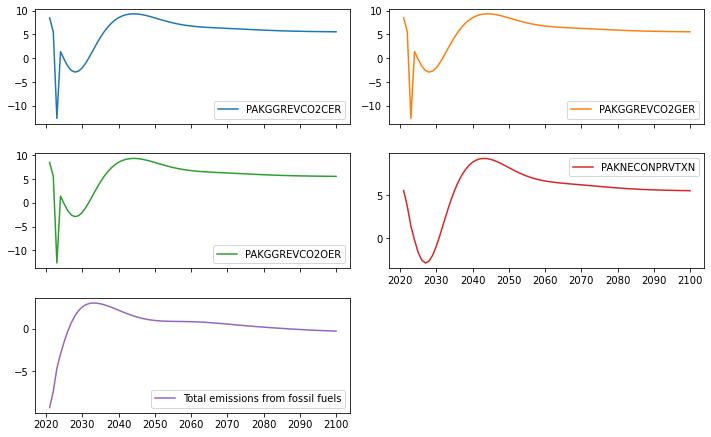

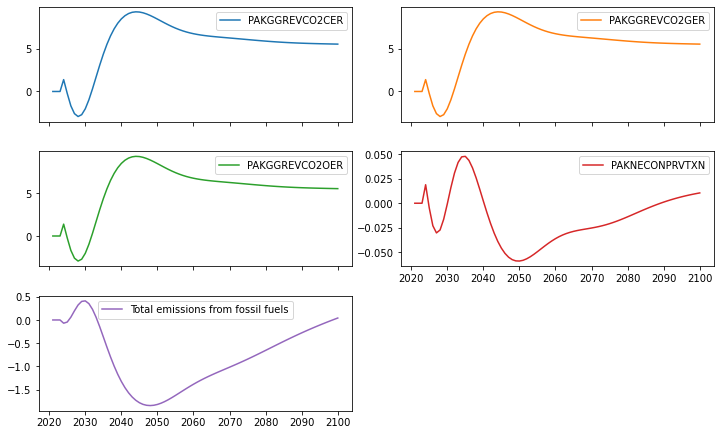

In [14]:
mpakreal['PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER PAKNECONPRVTXN PAKCCEMISCO2TKN']

# Now look at the results for the two models. 

In [15]:
mpakdisplay.keep_solutions = {**mpak.keep_solutions,**mpakreal.keep_solutions}
mpakdisplay.keep_solutions.keys()

dict_keys(['No tax change', 'Coal, Oil and Gastax : 29 nominal', 'Real model nominal tax = 29', 'Real model Real tax = 29'])

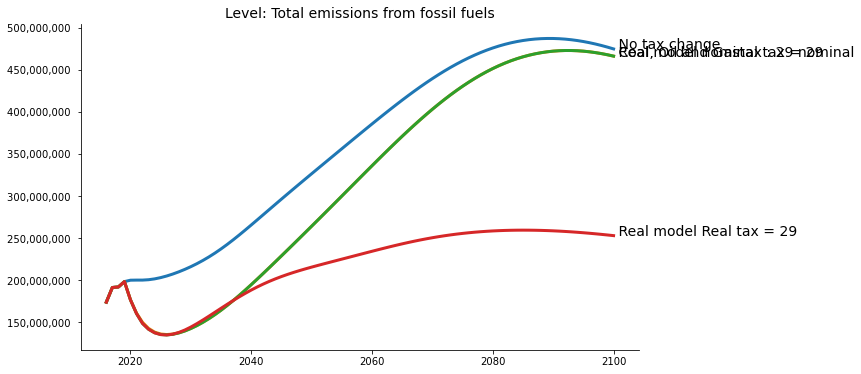

In [16]:
mpakdisplay.keep_plot('PAKCCEMISCO2TKN',2016,2100,diff=0,legend=0);

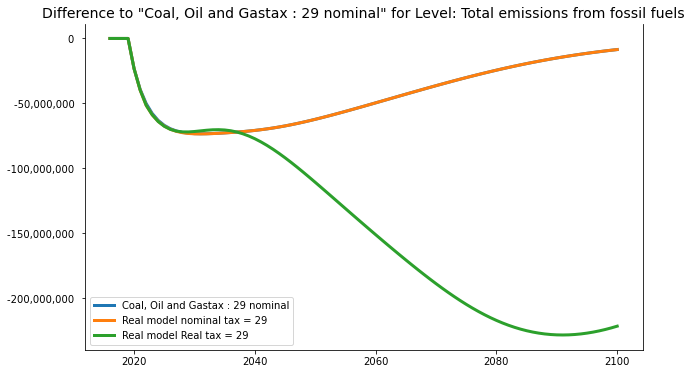

In [17]:
with mpakdisplay.keepswitch(scenarios='*'):
    mpakdisplay.keep_plot('PAKCCEMISCO2TKN',2016,2100,diff=1,legend=1);